Usemos el algoritmo **PCA**, listo en sklearn, para el problema de reducción de dimensionalidad.

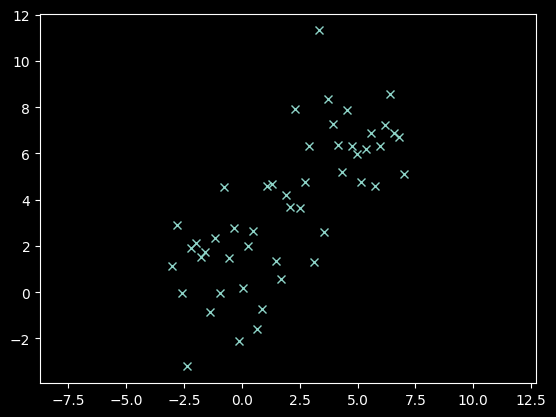

In [2]:
import pickle # El módulo pickle implementa un potente algoritmo para serializar y deserializar objetos Python.
import numpy as np
import matplotlib.pyplot as plt


with open('8.8_eigen.pkl', 'rb') as f:
    X = pickle.load(f)
    
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

In [3]:
print(X.shape)

(50, 2)


Aplique el algoritmo sklearn.decomposition.PCA al conjunto de datos:

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

Comprimimos datos *bidimensionales* en una matriz **unidimensional** usando PCA.

In [5]:
X_new = pca.inverse_transform(X_pca) # transformación inversa

Mostremos los datos "recuperados" en el gráfico (la segunda imagen es la matriz original sin comprimir)

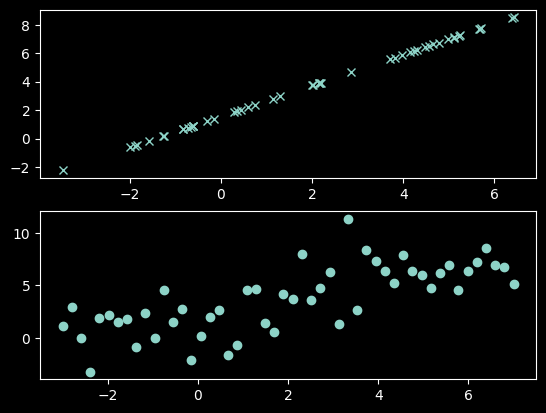

In [6]:
plt.figure(1)

plt.subplot(211) # Divide la figura en una cuadrícula de 2x1 y selecciona la primera subtrama
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212) # Cambia a la segunda subtrama en la cuadrícula de 2x1
plt.plot(X[:,0], X[:,1], 'o')

plt.show()

El algoritmo PCA reveló que la variable de x2 depende linealmente de la variable x1 - es decir, se puede utilizar la transformación lineal **x2=x1w1+w0** en lugar de la variable x2. "Datos comprimidos" es el gráfico de la función lineal x2=ax1+b .

**Implementación del algoritmo PCA**

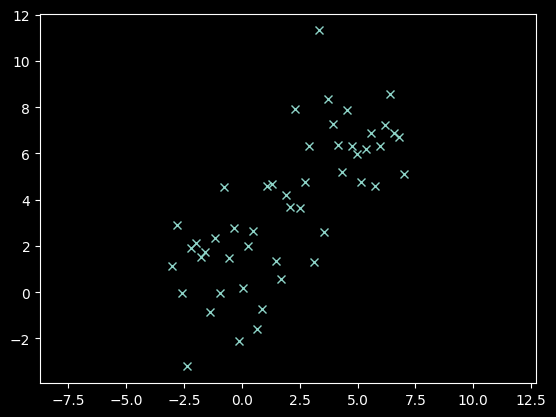

In [7]:
with open('8.8_eigen.pkl', 'rb') as f:
    X = pickle.load(f)
    
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

1. centrar las coordenadas

In [8]:
mean_val = X.mean(axis=0)
mean_val


array([2.        , 3.72384175])

In [9]:
N = X.shape[0] # número de filas

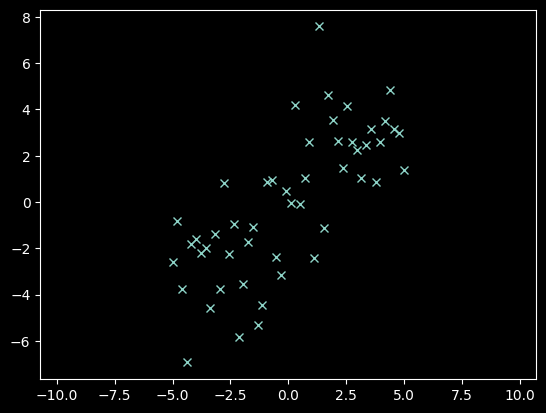

In [10]:
X_centered = X.copy() - mean_val
plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axis('equal')
plt.show()

2. calcular la matriz de covarianza "por definición"

In [11]:
X_cov = X_centered.T.dot(
    X_centered
) / (N-1)

print("Matriz de covarianza:\n{}\n".format(
    X_cov))

# Matriz de covarianza de numpy
print("Matriz de covarianza de numpy:\n{}\n".format(
    np.cov(X_centered, rowvar=0))
)


Matriz de covarianza:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]

Matriz de covarianza de numpy:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]



3. queremos encontrar vectores (esos mismos componentes principales) que, cuando se proyecten (es decir, se multipliquen), nuestros datos retendrán la proporción máxima de su varianza.

In [12]:
from numpy import linalg

valores_propios, vectores_propios = linalg.eig(X_cov)
print(''.join(
    'lambda_{} ={}, w = {}\n'.format(eig_id,valores_propios[eig_id], vectores_propios[:,eig_id]) 
    for eig_id in range(valores_propios.size))
)

lambda_0 =2.57136935073713, w = [-0.7352406   0.67780621]
lambda_1 =16.238803136510406, w = [-0.67780621 -0.7352406 ]



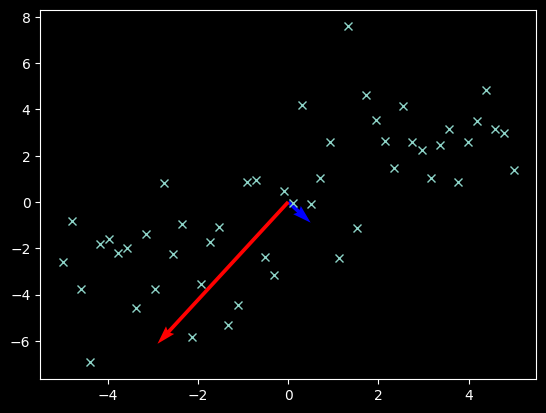

In [13]:
import matplotlib.pyplot as plt

origin = X_centered.mean(axis=0)


rotated_vector1 = np.array([-vectores_propios[1, 1], vectores_propios[0, 1]])
rotated_vector2 = np.array([-vectores_propios[1, 0], vectores_propios[0, 0]])

plt.quiver(*origin, rotated_vector1[0], rotated_vector1[1], color='b', scale=valores_propios[1])
plt.quiver(*origin, rotated_vector2[0], rotated_vector2[1], color='r', scale=valores_propios[0])
plt.plot(X_centered[:, 0], X_centered[:, 1], 'x')
plt.show()


Tenemos dos características que corresponden a dos vectores propios. Elijamos el vector propio que corresponde al valor propio máximo y multipliquemos nuestra matriz de observación por él. Es decir, teníamos datos bidimensionales, y hemos pasado a datos unidimensionales

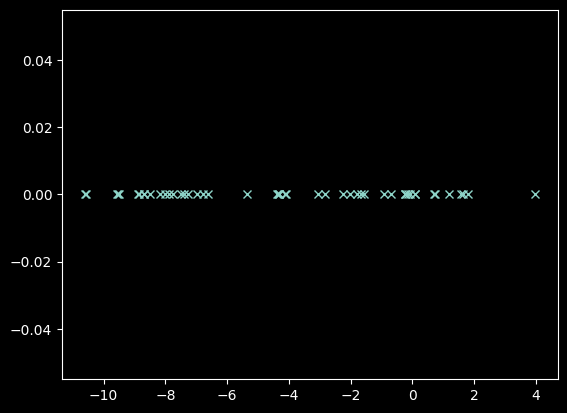

In [14]:
max_eigenval = np.argmax(valores_propios)

max_eigenvec = vectores_propios[:,max_eigenval].reshape(-1,1)

# reshape(-1, 1) convertirá una matriz unidimensional en una matriz bidimensional, donde el número de filas se calculará automáticamente y el número de columnas será 1.

X_redused = X.dot(max_eigenvec)

plt.plot(X_redused, np.zeros(N), 'x')

Realicemos la transformación inversa: pasemos del caso unidimensional al bidimensional

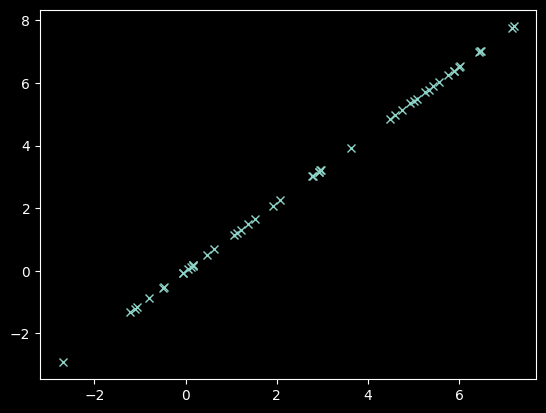

In [15]:
X_inverse = X_redused.dot(max_eigenvec.reshape(1,-1))

plt.plot(X_inverse[:,0], X_inverse[:,1], 'x')

plt.show()

Proyectamos nuestros datos desde un espacio bidimensional a un espacio unidimensional (de un plano a una línea) utilizando el algoritmo PCA.

***SVD***

Aplicar reducción de dimensionalidad *usando SVD*

In [20]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=1).fit(X)
X_svd = svd_model.transform(X)
X_svd 

array([[-0.74822365],
       [ 0.82837175],
       [-1.50733603],
       [-3.99986685],
       [ 0.34368607],
       [ 0.65022432],
       [ 0.26112661],
       [ 0.559613  ],
       [-1.4845917 ],
       [ 1.27210421],
       [-0.58533609],
       [ 3.31221931],
       [ 0.89428692],
       [ 2.0833943 ],
       [-1.81118765],
       [ 0.1667028 ],
       [ 1.8128714 ],
       [ 2.43899196],
       [-0.9459678 ],
       [-0.09017116],
       [ 4.39036199],
       [ 4.58532014],
       [ 1.96888806],
       [ 1.41928926],
       [ 4.53679783],
       [ 4.21355894],
       [ 7.8479204 ],
       [ 4.40827436],
       [ 5.47017639],
       [ 6.84469558],
       [ 2.82199488],
       [11.21124418],
       [ 4.14481079],
       [ 9.01117461],
       [ 8.23198661],
       [ 7.58155599],
       [ 6.74589409],
       [ 9.07884956],
       [ 7.90853244],
       [ 7.72794792],
       [ 6.83433857],
       [ 8.13666751],
       [ 8.83612771],
       [ 7.0353363 ],
       [ 8.58646031],
       [ 9

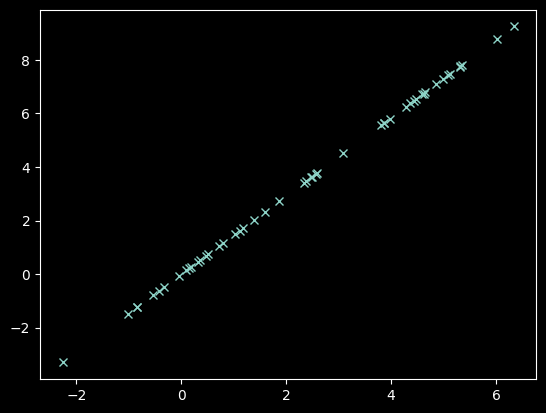

In [22]:
# transforma los datos de nuevo al espacio original
X_svd_restored = svd_model.inverse_transform(X_svd)

plt.plot(X_svd_restored[:,0], X_svd_restored[:,1], 'x')
plt.show()